In [1]:
import pandas as pd
df = pd.read_csv('sample_Hansard_data.csv')
df.head()

,text,label,Labels_Final
0,"Oh, yes! Is it Māpua?","P,P,P,P,M",B
1,It is fascinating that I am seeing a real rev ...,"P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,...",B
2,What else is the Government doing to ensure th...,"P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,M,P",B
3,"First, you will note that there has been quite...","P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,M,M,P,P,P,P,...",B
4,It is certainly my view that the Kenepuru site...,"P,P,P,P,P,P,P,M,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,...",B


In [2]:
df['category_id'] = df['Labels_Final'].factorize()[0]
from io import StringIO
category_id_df = df[['Labels_Final', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Labels_Final']].values)



In [3]:
df.head()

,text,label,Labels_Final,category_id
0,"Oh, yes! Is it Māpua?","P,P,P,P,M",B,0
1,It is fascinating that I am seeing a real rev ...,"P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,...",B,0
2,What else is the Government doing to ensure th...,"P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,M,P",B,0
3,"First, you will note that there has been quite...","P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,M,M,P,P,P,P,...",B,0
4,It is certainly my view that the Kenepuru site...,"P,P,P,P,P,P,P,M,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,...",B,0


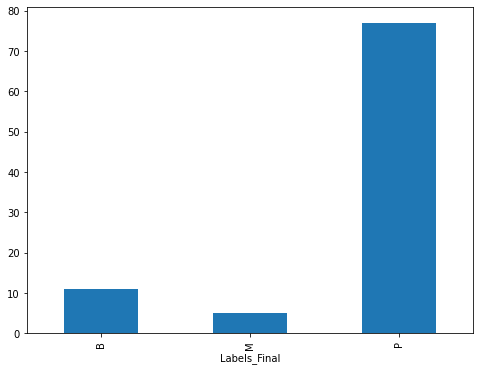

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Labels_Final').text.count().plot.bar(ylim=0)
plt.show()



In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df.text).toarray()
labels = df.category_id
features.shape



(93, 11)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['category_id'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf

<69x563 sparse matrix of type '<class 'numpy.float64'>'
	with 1032 stored elements in Compressed Sparse Row format>